# Test run Sutie2p 

follows the official notbeook tutorial but with a few modifications

https://github.com/MouseLand/suite2p/blob/main/jupyter/run_suite2p_colab_2023.ipynb

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import suite2p
from suite2p.run_s2p import run_s2p

In [2]:
# Figure Style settings for notebook.
import matplotlib as mpl
mpl.rcParams.update({
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.frameon': False,
    'figure.subplot.wspace': .01,
    'figure.subplot.hspace': .01,
    'figure.figsize': (18, 13),
    'ytick.major.left': True,
})
jet = mpl.colormaps.get_cmap('jet')
jet.set_bad(color='k')


## setting up parameters and running suite2p

In [5]:
#fname = r"D:\Anne\Data_from_Angelique\032224_octo_cal520_000_010.sbx"

In [3]:
ops = suite2p.default_ops() # populates ops with the default options

ops['batch_size'] = 200 # we will decrease the batch_size in case low RAM on computer

#ops['threshold_scaling'] = 2.0 # we are increasing the threshold for finding ROIs to limit the number of non-cell ROIs found (sometimes useful in gcamp injections)
#ops['threshold_scaling']=0.5
# have tried 1, 0.5

ops['fs'] = 10 # sampling rate of recording, determines binning for cell detection
# 10 Hz

#ops['tau'] = 0.5 # timescale of calcium indicator to use for deconvolution

# from documentation:
# 0.7 for GCaMP6f
# 1.0 for GCaMP6m
# 1.25-1.5 for GCaMP6s
# we have Cal520 which has a faste decay than gCamp6f, I have first estimate of 0.5 by comparing gCamp6 series to OGB1 then OGB1 to CAL520 according to the following papers
# compares Cal520 and OGB1 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4232931/
# compares gcamp6 series to OGB1 (Figure 1) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3777791/

ops['input_format'] = "sbx"
# specify that our file input format is sbx

ops["reg_tif"]= True
# save the registreation result as tiff

#ops['data_path']=['D:\\Anne\\Data_from_Angelique\\']

#ops['two_step_registration']= True
# run registration two times for low SNR recordings
#ops['keep_movie_raw']= True
#ops['reg_tif']= True
# save registered movie since view registered binary in GUI does not work somehow to see the registration result after two-step registration..?

#ops['look_one_level_down']=True

ops['sbx_ndeadcols']= 70
ops['sbx_ndeadrows']= 4
# an estimate by me, to be refined in the future
# Notes on sbx_ndeadcol=-1
# -1 lets sbxreader estimate the number dead columns to remove- ended up giving 400 in an 700x700x image which removes the first 400 or so column, does not make sense!
# note that I changed the code in sbxreader reader.py so that this also estimates on unidirectional scanning sessions
# also changed the code in suite2p.io.sbx (ie. get rids of if scanmode == bidirectional condition) to perform deadcolumn estimation


## batch run

In [7]:

# batch run 
# https://github.com/MouseLand/suite2p/blob/master/jupyter/run_pipeline_tiffs_or_batch.ipynb

# make a list of db's and loop over them

#data_dir= r'D:\Anne\Data_from_Angelique\Data'
data_dir= r'D:\Anne\Data_from_Des\20240531'

db=[]
for i in os.listdir(data_dir):
    db.append({f'data_path': [os.path.join(data_dir,i)]})

db

[{'data_path': ['D:\\Anne\\Data_from_Des\\20240531\\4']},
 {'data_path': ['D:\\Anne\\Data_from_Des\\20240531\\5']},
 {'data_path': ['D:\\Anne\\Data_from_Des\\20240531\\6']},
 {'data_path': ['D:\\Anne\\Data_from_Des\\20240531\\7']},
 {'data_path': ['D:\\Anne\\Data_from_Des\\20240531\\8']}]

In [5]:
ops_name= 'ops0'

In [10]:
db[3:4]

[{'data_path': ['D:\\Anne\\Data_from_Des\\20240531\\7']}]

In [12]:
# batch run 
# https://github.com/MouseLand/suite2p/blob/master/jupyter/run_pipeline_tiffs_or_batch.ipynb

# make a list of db's and loop over them

for dbi in db[3:4]:
    output_ops = suite2p.run_s2p(ops=ops, db=dbi)
    
    print('Done running suite2p for current file, relocating results to separate folder..')
    
    #relocate the output files to a separate folder- for parameter testing purposes
    this_path= os.path.join(dbi['data_path'][0], f'suite2p\\plane0\\{ops_name}')
    os.mkdir(this_path)
    
    for i in Path(output_ops['save_path']).iterdir():
        this_name= os.path.basename(i)
        if '.npy' in str(i):
            Path(i).rename(this_path + f'\{this_name}')
        else:
            pass

print(f'Finished running {len(db)} files!')

{'data_path': ['D:\\Anne\\Data_from_Des\\20240531\\7']}
sbx
** Found 1 sbx - converting to binary **
Scanbox files:
D:\Anne\Data_from_Des\20240531\7\20240531_actual_cal520_A568_epor_000_007.sbx
Removing 70 dead columns while loading sbx data.
Removing 4 dead rows while loading sbx data.
time 82.57 sec. Wrote 5974 frames per binary for 1 planes
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not registered / registration forced with ops['do_registration']>1
      (no previous offsets to delete)
NOTE: applying default C:\Users\Anne\.suite2p\classifiers\classifier_user.npy
----------- REGISTRATION
Reference frame, 16.46 sec.
Registered 200/5974 in 6.93s
Registered 400/5974 in 13.76s
Registered 600/5974 in 20.49s
Registered 800/5974 in 27.14s
Registered 1000/5974 in 33.80s
Registered 1200/5974 in 40.45s
Registered 1400/5974 in 46.97s
Registered 1600/5974 in 53.52s
Registered 1800/5974 in 60.16s
Registered 2000/5974 in 66.76s
Registered 2200/5974 in 73.51s
Registered 2400/5974 in

In [12]:
list(Path(output_ops['save_path']).iterdir())
# shows the paths of various output files for executing run_s2p once

[WindowsPath('D:/Anne/Data_from_Angelique/Data/030524/suite2p/plane0/data.bin'),
 WindowsPath('D:/Anne/Data_from_Angelique/Data/030524/suite2p/plane0/ops0')]

#### reconfigure stimulation file from mat to numpy - highjacking a channel in the s2p gui

In [13]:
from scipy.io import loadmat
import numpy as np

In [14]:
data=loadmat(r'D:\Anne\Matlab_test\data\to_save.mat')

In [15]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Apr 16 14:09:34 2024',
 '__version__': '1.0',
 '__globals__': [],
 'to_save': array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [16]:
data= data['to_save']

In [17]:
data.astype('float64')

array([[0., 0., 0., ..., 0., 0., 0.]])

In [20]:
spks= np.load('D:/Anne/Data_from_Angelique/Data/022124/suite2p/plane0/ops0/spks.npy')


In [21]:
print(spks.shape)

print(data.shape)

(1010, 3224)
(1, 3224)


In [22]:
data_reshaped = np.repeat(data, repeats=spks.shape[0], axis=0)
print(data_reshaped.shape)
np.save('test_reshaped',data_reshaped.astype('float64'))

(1010, 3224)


## test regions

In [6]:


sbx_file= r'D:\Anne\Data_from_Angelique\020124\020124_octo_cal520_000_014.sbx'


In [ ]:
from sbxreader import sbx_get_metadata
metadata = sbx_get_metadata(sbxfile)

print(metadata) # dictionary with the recording metadata

from sbxreader import sbx_memmap
dat = sbx_memmap(sbxfile)
# This memory maps the file, the shape is:
# NFRAMES x NPLANES x NCHANNELS x HEIGHT x WIDTH
# To access frames treat it like a numpy array
# BUT create a new array when getting the frame:
# that is needed because the file is memory mapped.


In [25]:

colprofile = np.mean(dat[0][0][0],axis = 0)
ndeadcols = np.argmax(np.diff(colprofile)) + 1

#del tmpsbx
print('Removing {0} dead columns while loading sbx data.'.format(ndeadcols))


Removing 404 dead columns while loading sbx data.


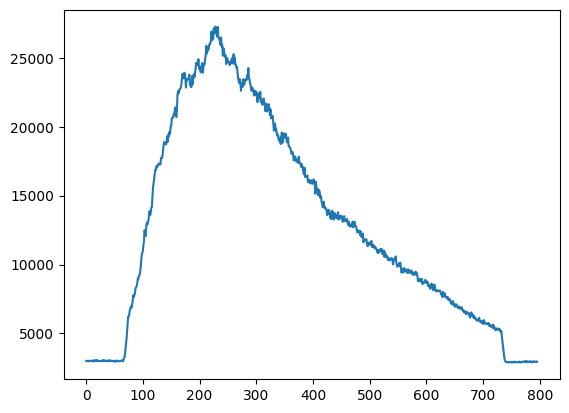

In [37]:
plt.plot((colprofile))

In [35]:
ndeadcols = np.argmax(np.diff(colprofile))
ndeadcols

403

#### Trying to plot cell traces in more interactive ways

In [1]:
# tries to figure out getting the visual stimulus times and types

import plotly

import numpy as np

import os


In [2]:
folder= r'D:/Anne/Data_from_Angelique/Data/030524/suite2p/plane0/ops0/'

F = np.load(os.path.join(folder, 'F.npy'), allow_pickle=True)
Fneu = np.load(os.path.join(folder, 'Fneu.npy'), allow_pickle=True)
spks = np.load(os.path.join(folder, 'spks_original.npy'), allow_pickle=True)
stat = np.load(os.path.join(folder, 'stat.npy'), allow_pickle=True)
ops =  np.load(os.path.join(folder, 'ops.npy'), allow_pickle=True)
ops = ops.item()
iscell = np.load(os.path.join(folder, 'iscell.npy'), allow_pickle=True)

events = np.load(os.path.join(folder, 'spks.npy'), allow_pickle=True)


In [10]:
F.shape

(631, 3180)

## visualizations

In [65]:
#output_ops_file = np.load(Path(output_ops['save_path']).joinpath('ops.npy'), allow_pickle=True).item()
output_ops_file = np.load(r'D:\Anne\Data_from_Angelique\Data\022124\suite2p\plane0\ops1\ops.npy', allow_pickle=True).item()

output_ops_file.keys() == output_ops.keys()

# load various files for visualization

True

In [70]:
output_ops=output_ops_file

In [ ]:
# just some info to load all the otheroutputs..

F = np.load('F.npy', allow_pickle=True)
Fneu = np.load('Fneu.npy', allow_pickle=True)
spks = np.load('spks.npy', allow_pickle=True)
stat = np.load('stat.npy', allow_pickle=True)
ops =  np.load('ops.npy', allow_pickle=True)
ops = ops.item()
iscell = np.load('iscell.npy', allow_pickle=True)

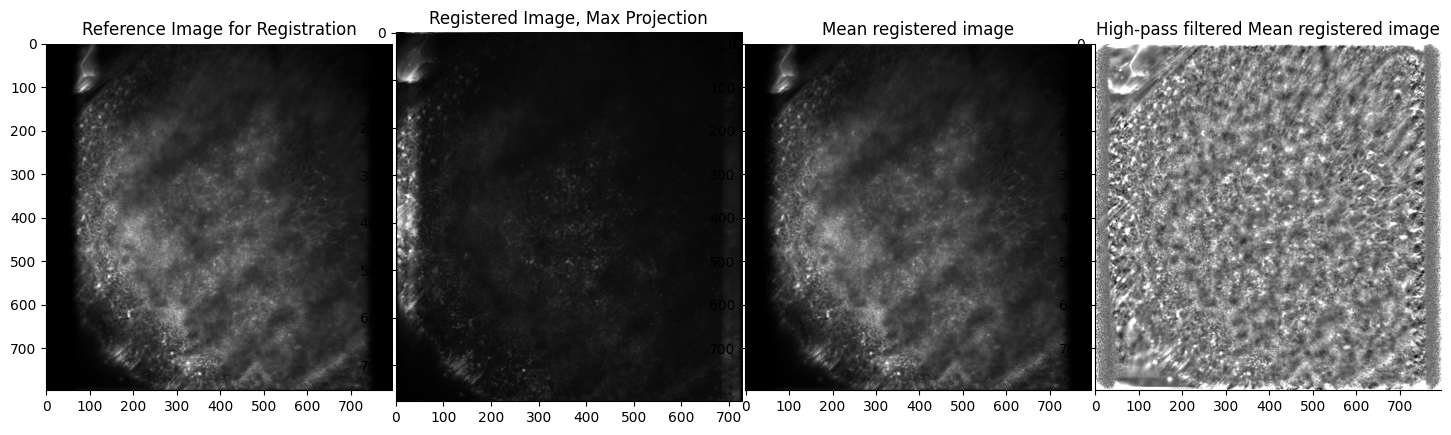

In [71]:
# registration

plt.subplot(1, 4, 1)

plt.imshow(output_ops['refImg'], cmap='gray', )
plt.title("Reference Image for Registration");

# maximum of recording over time
plt.subplot(1, 4, 2)
plt.imshow(output_ops['max_proj'], cmap='gray')
plt.title("Registered Image, Max Projection");

plt.subplot(1, 4, 3)
plt.imshow(output_ops['meanImg'], cmap='gray')
plt.title("Mean registered image")

plt.subplot(1, 4, 4)
plt.imshow(output_ops['meanImgE'], cmap='gray')
plt.title("High-pass filtered Mean registered image");

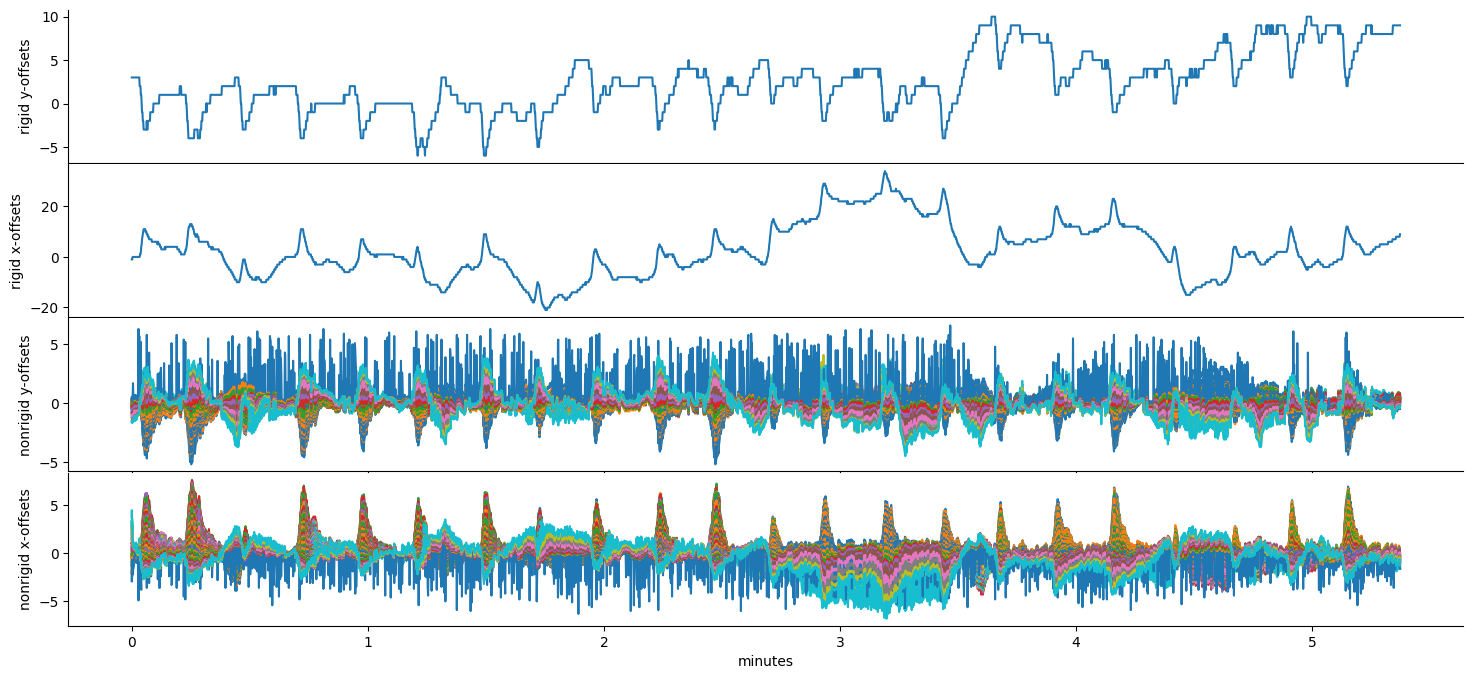

(3224, 100)


In [72]:
# check out the imgage shift in the first min

plt.figure(figsize=(18,8))

x=np.arange(0, len(output_ops['yoff']),1)
x=x/600
# divide the total numbers of frame by 10, converting to minutes, sincer we acquire at 10hz

plt.subplot(4,1,1)
plt.plot(x,output_ops['yoff'])
plt.ylabel('rigid y-offsets')

plt.subplot(4,1,2)
plt.plot(x,output_ops['xoff'])
plt.ylabel('rigid x-offsets')

plt.subplot(4,1,3)
plt.plot(x,output_ops['yoff1'])
plt.ylabel('nonrigid y-offsets')

plt.subplot(4,1,4)
plt.plot(x,output_ops['xoff1'])
plt.ylabel('nonrigid x-offsets')
plt.xlabel('minutes')

plt.show()

print (output_ops['yoff1'].shape)
# ie. (5998, 100) what does the second dimension mean?

Observations
- slow fluctuation of image drift, around 5-6 cycles per minute
- large fluctuationin the initial few frames , what might be the cause?? Consider disgard these frames

(2000, 30)


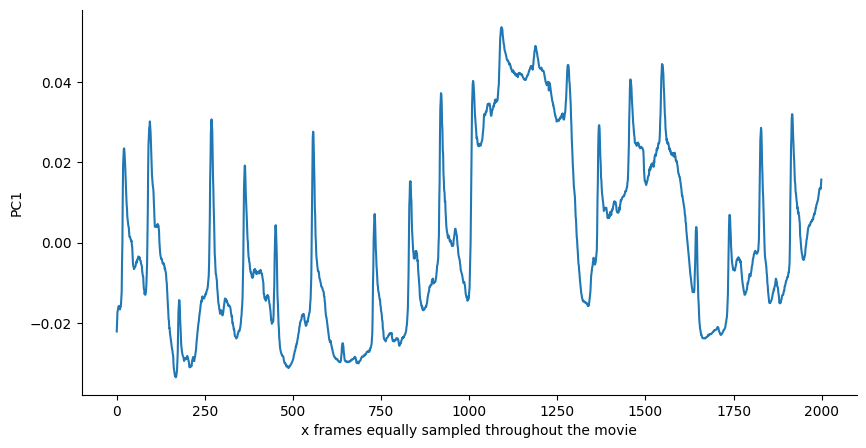

In [73]:
print(output_ops['tPC'].shape)

plt.figure(figsize=(10,5))
plt.plot(output_ops['tPC'][:,0])
plt.ylabel('PC1')
plt.xlabel('x frames equally sampled throughout the movie')
plt.show()

# plots the first principal component of 2000 frames sampled equally throughout the movie
# once again show a slow fluctuation 

(2, 30, 776, 728)


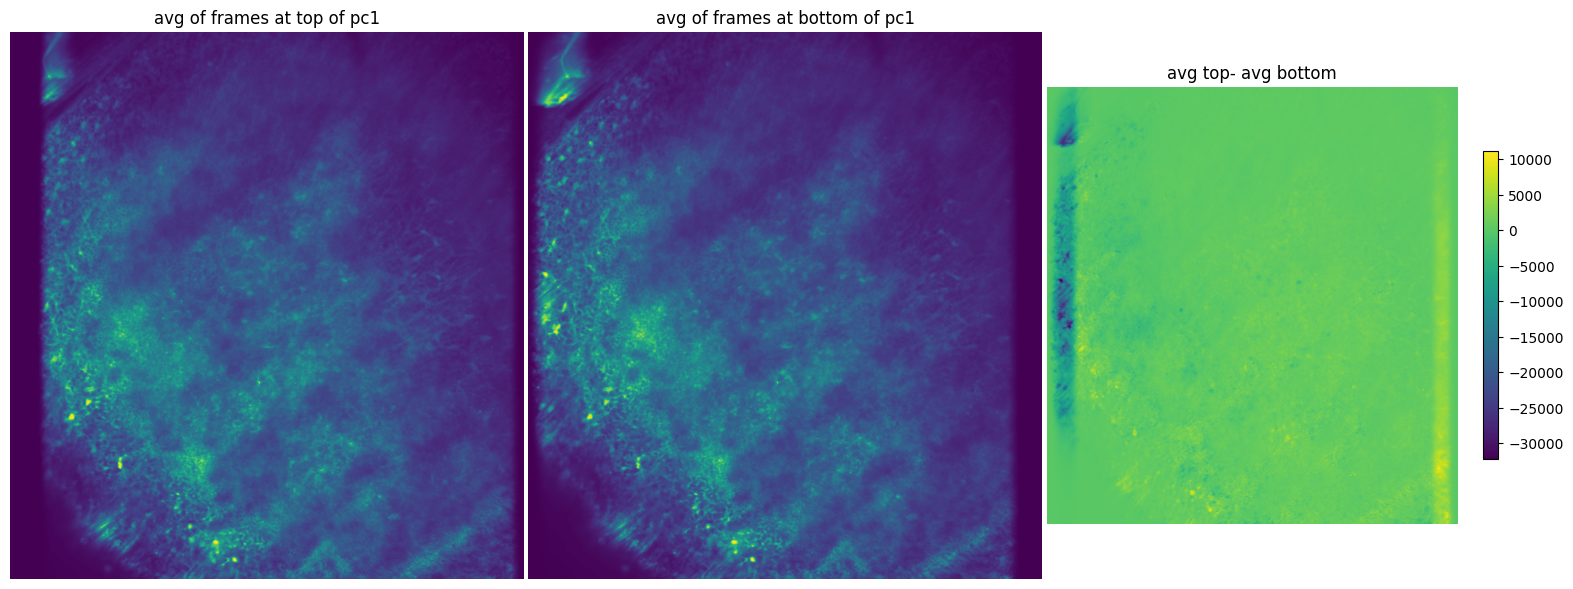

In [74]:
print(output_ops['regPC'].shape)
# how come the image dimensions changed? from (796, 796) to (780,712)

# ie. top(0) and bottom(1)of each principal components, different principal components(ie, 30), ,image dim1, image dim2 
# average of the top or bottom 500 frames of a given PC

plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.imshow(output_ops['regPC'][0,0,:,:])
plt.title('avg of frames at top of pc1')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(output_ops['regPC'][1,0,:,:])
plt.title('avg of frames at bottom of pc1')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(output_ops['regPC'][0,0,:,:]-output_ops['regPC'][1,0,:,:])
plt.title('avg top- avg bottom')
plt.axis('off')

plt.colorbar(shrink=0.5)


#### this is another way of running suite2p

from suite2p.run_s2p import run_s2p
ops1 = run_s2p(ops, db)

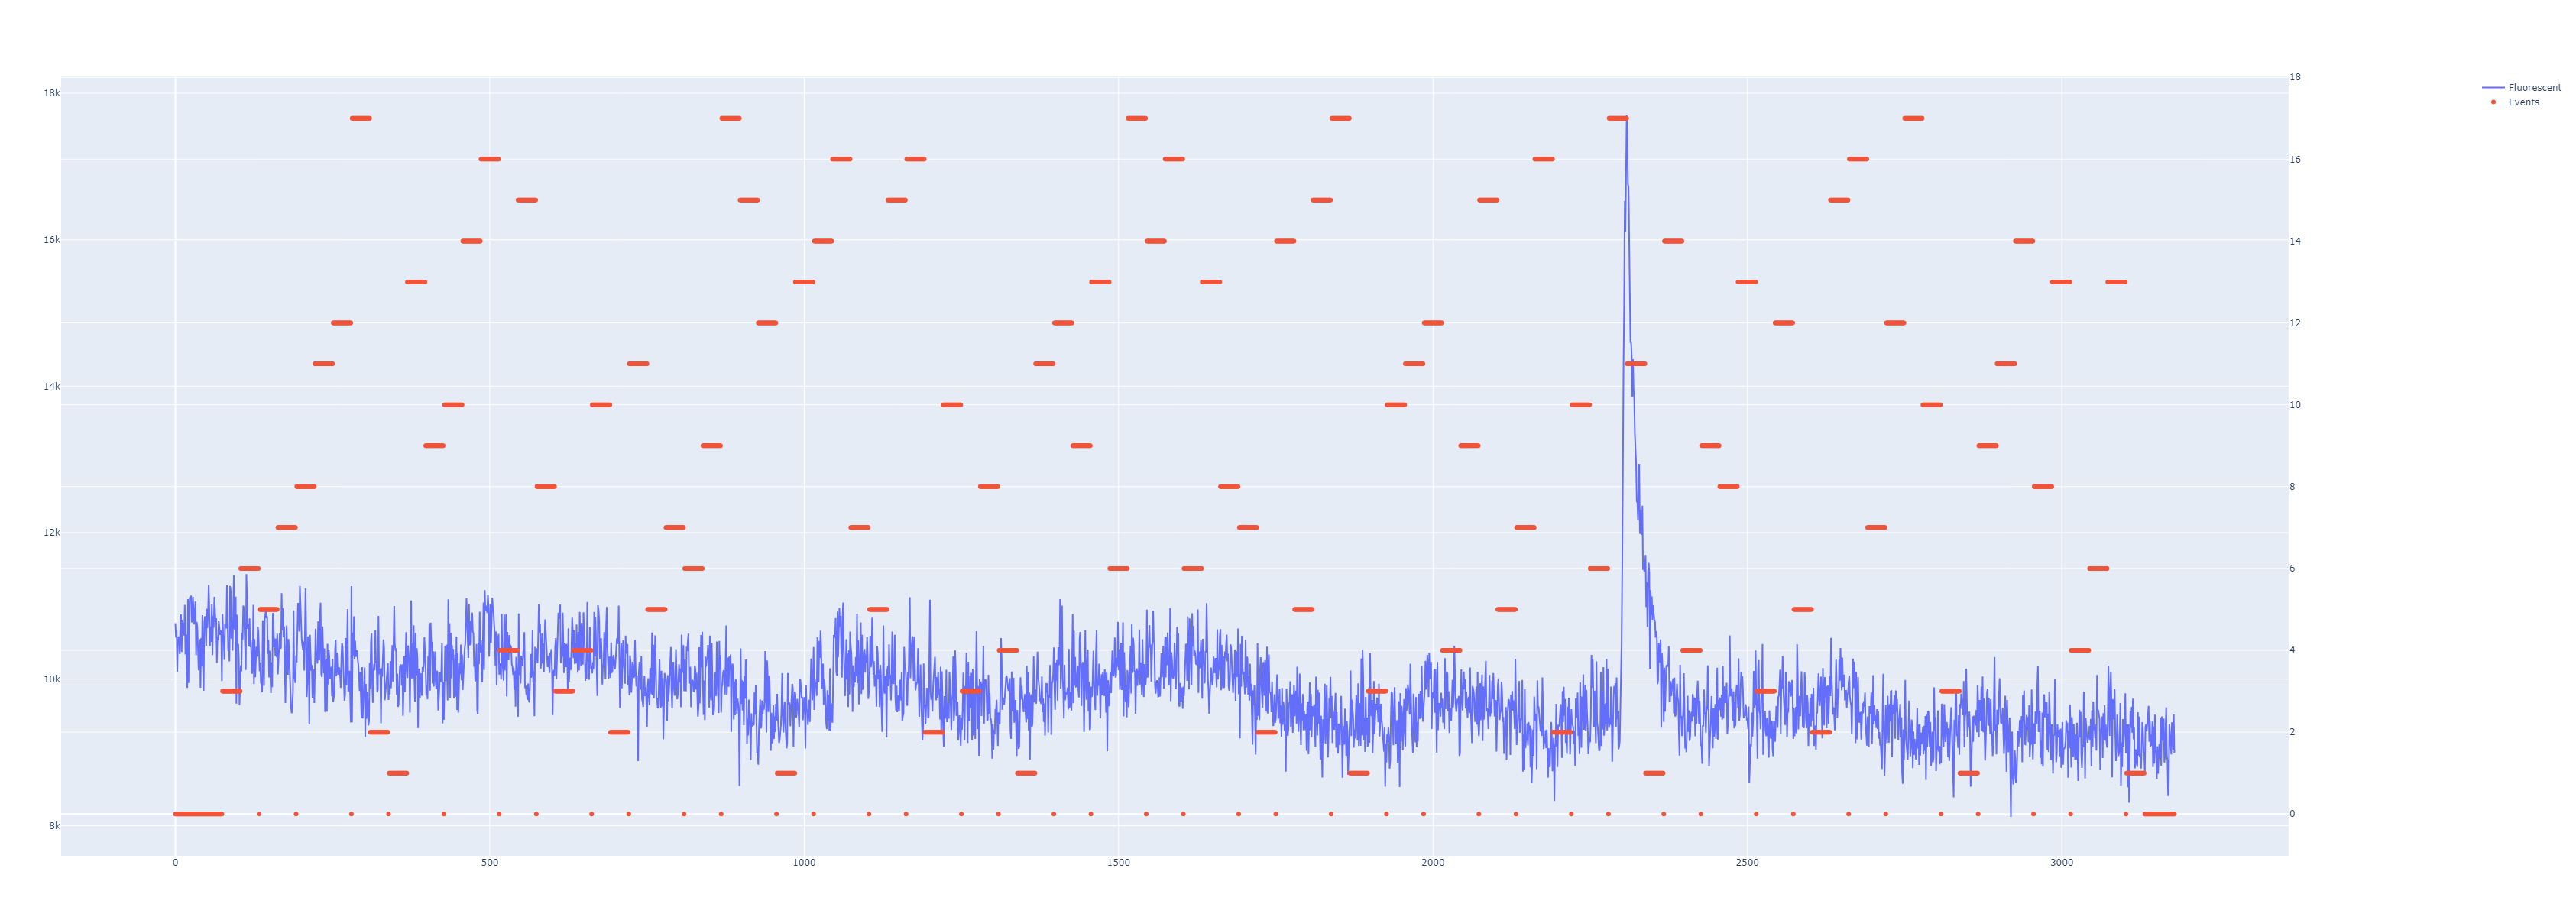

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

frames= list(range(0, events.shape[1]))

# Create traces
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=frames, y=F[98,:],
                    mode='lines',
                    name='Fluorescent'))

fig.add_trace(go.Scatter(x=frames, y=events[0,:],
                         mode='markers', 
                         name='Events'),
                         secondary_y=True)

fig.update_layout(hovermode="x", height=1200, width=2400)


fig.show()

In [8]:
import matplotlib.pyplot as plt

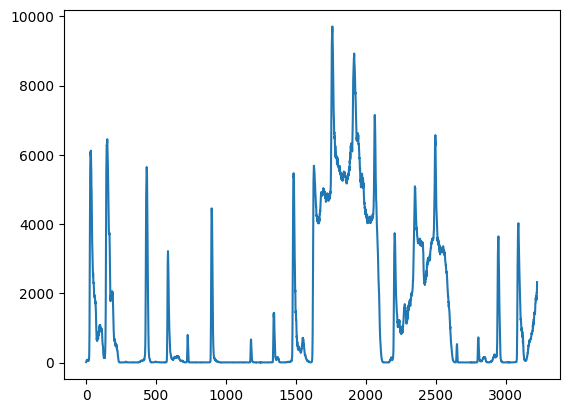

In [12]:
plt.plot(Fneu[1,:])
plt.show()